## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 1: Naive Bayes
### Total Points: 100 points

You will be dealing with movie review data that includes both positive and negative reviews in this assignment. You will use Sentiment Analysis to assess if a given review is positive or negative using the provided dataset.

Therefore, we will make use of Naive Bayes algorithm to perform sentiment analysis on the movie review dataset.

## Importing the Libraries

In [1]:
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Reading the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library. 

In [2]:
## Reading the data and removing columns that are not important. 
df = pd.read_csv("movie_reviews.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [3]:
#Display the head of the dataframe
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,"Petter Mattei's ""Love in the Time of Money"" is...",positive
4,"Probably my all-time favorite movie, a story o...",positive


## Count plot of the output categories: positive or negative

Feel free to take a look at the output and whether the classes are balanced or imbalanced. 

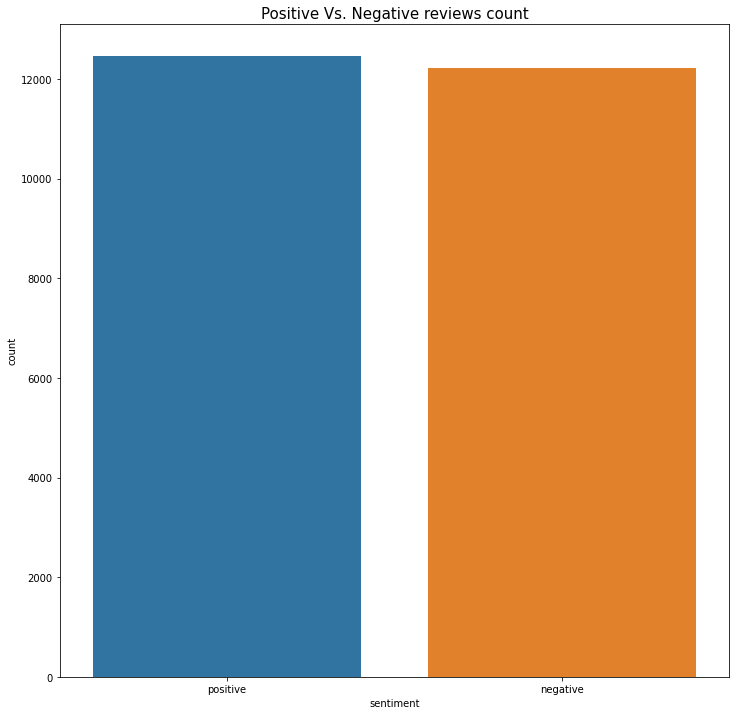

In [4]:
plt.figure(figsize = (12,12))
sns.countplot(data = df, x="sentiment")
plt.title("Positive Vs. Negative reviews count", fontsize = 15)
plt.show()


## Upsampling the minority class: (5 points)

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is little imbalanced. Therefore, class balancing can be done before giving it to the Naive Bayes model for prediction. 

Feel free to use 'resample' library from sklearn. 

In [5]:
## hint: use resample from sklearn.utils
from sklearn.utils import resample

df_majority = df.loc[df["sentiment"] == "positive"]
df_minority = df.loc[df["sentiment"] == "negative"]

negative_upsample = resample(df_minority, replace = True, 
                        n_samples = df_majority.shape[0],
                        random_state = 101)

df_upsampled = pd.concat([df_majority, negative_upsample])  # concat two data frames i,e majority class data set and upsampled minority class data set
df_upsampled = df_upsampled.sample(frac = 1)

In [6]:
## Just to ensure that upsampling was done successfully, take a look at the shape of the data in 
## this cell. 

# print the shape of data set with the help of shape function having "negative" as class label
df_upsampled.loc[df_upsampled["sentiment"] == "negative"].shape

(12474, 2)

### Expected Output : 
(12474, 2)

In [7]:
## Ensure that the same number of data points are present for both 'positive' and 'negative' data

# print the shape of data set with the help of shape function having "positive" as class label
df_upsampled.loc[df_upsampled["sentiment"] == "positive"].shape

(12474, 2)

### Expected Output : 
(12474, 2)

In [8]:
## In this cell, we are going to be dividing the data into train and test points
## Ensure that you store the upsampled data in a variable called 'df_upsampled' 
## so that the below operations are performed successfully


## Considering 10000 positive and 10000 negative data points
negative_data_points_train = df_upsampled.loc[df_upsampled["sentiment"] == "negative"].iloc[:10000]
positive_data_points_train = df_upsampled.loc[df_upsampled["sentiment"] == "positive"].iloc[:10000]

## Considering the remaining data points for test
negative_data_points_test = df_upsampled.loc[df_upsampled["sentiment"] == "negative"].iloc[10000:]
positive_data_points_test = df_upsampled.loc[df_upsampled["sentiment"] == "positive"].iloc[10000:]

## Concatenate the training positive and negative reviews
X_train = pd.concat([positive_data_points_train.review, negative_data_points_train.review])
## Concatenating the training positive and negative outputs
y_train = pd.concat([positive_data_points_train.sentiment, negative_data_points_train.sentiment])

## Concatenating the test positive and negative reviews
X_test = pd.concat([positive_data_points_test.review, negative_data_points_test.review])
## Concatenating the test positive and negative outputs
y_test = pd.concat([positive_data_points_test.sentiment, negative_data_points_test.sentiment])


In [9]:
## Take a look at the total number of classes and their count using '.value_counts()' for y_train and y_test.
## Ensure that there are equal number of positive and negative reviews. 
y_train.value_counts()

positive    10000
negative    10000
Name: sentiment, dtype: int64

### Expected Output:
negative    10000<br>
positive    10000<br>
Name: sentiment, dtype: int64

In [10]:
y_test.value_counts()

positive    2474
negative    2474
Name: sentiment, dtype: int64

### Expected Output : 
negative    2474<br>
positive    2474<br>
Name: sentiment, dtype: int64

## Q1. Pre-process the reviews: (10 points)

We know that a review contains links, punctuation, stopwords and many other words that don't give a lot of meaning for the Naive Bayes model for prediction. 

In the cell below, one must implement text-preprocessing and remove links, punctuations and stopwords. It is also important to lowercase the letters so that 'Admire' and 'admire' are not treated as different words. 

In addition to this, perform stemming operation so that similar words are reduced. To know more about stemming, feel free to take a look at this link.

https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [11]:
# TASK CELL
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    review_process = review
    review_process = re.sub(r"\S*https?://\S+", "", review_process) #Remove links containing http or https
    review_process = re.sub(r"[^\w\s]", "", review_process) #Remove Punctuation Marks
    review_process = review_process.lower()

    #Tokenize text and remove stop words
    token_lowercase = word_tokenize(review_process)
    stop_words = stopwords.words('english')
    token_final=[]
    for i in token_lowercase:
        if i in stop_words:
            continue
        token_final.append(i)
    
    #Perform Stemming
    #review_cleaned_1 = []
    #for i in token_final:
    #    review_cleaned_1.append(PorterStemmer().stem(i))

    #Perform Lemmatization
    review_cleaned = []
    for i in token_final:
        temp = WordNetLemmatizer().lemmatize(i)
        review_cleaned.append(temp)
    


    return review_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\samee\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Q2. Implement a find_occurrence function (5 points):

In this function, we find the total occurrence of a word giving information such as label, word and frequency dictionary.

Note that this function is used later in the code when we are going to be predicting the output using Naive Bayes. 

In [12]:
# TASK CELL
def find_occurrence(frequency, word, label):
    '''
    Params:
        frequency: a dictionary with the frequency of each pair (or tuple)
        word: the word to look up
        label: the label corresponding to the word
    Return:
        n: the number of times the word with its corresponding label appears.
    '''
    if (word, label) in frequency.keys():
        n=frequency[(word, label)]
  
    return n

### Converting output to numerical format:

We have outputs as 'positive' or 'negative'. In the cell below, we convert it to a numerical format. 

In [13]:
## With the use of mapping function, we replace
## the label in the form of string to an integer. 

output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

In [14]:
## Ensuring that there are equal number of classes on the training data. 
y_train.value_counts()

0    10000
1    10000
Name: sentiment, dtype: int64

In [15]:
## Choosing a random review and taking a look at it.
X_train.iloc[0]

"I now that these days, some people wan't see a movie without movie styling, so much Dogma, Lars Von, Watchosky Brothers, are changed what we expect in a movie, perhaps, Casomai is no-one-more-Independent-non-american movie, the movie take all movies resources and language to tell us a simple history about love and marriage, but much more .. Fully of views, lectures and let you thinking ... and I'm sure, you can't fell boried any second of a long 116 minutes. I calculate that don't have a single scene longer that 3 o 2 1/2 minutes."

From the above cell output, it could be seen that there are a lot of words that don't add a lot of meaning to the text. 

Therefore, those words would be removed. It also reduces the computation time. 

Therefore, it is a good practice we are following.

In [16]:
custom_review = X_train.iloc[0]

# print cleaned review
print(clean_review(custom_review))

['day', 'people', 'want', 'see', 'movie', 'without', 'movie', 'styling', 'much', 'dogma', 'lars', 'von', 'watchosky', 'brother', 'changed', 'expect', 'movie', 'perhaps', 'casomai', 'noonemoreindependentnonamerican', 'movie', 'movie', 'take', 'movie', 'resource', 'language', 'tell', 'u', 'simple', 'history', 'love', 'marriage', 'much', 'fully', 'view', 'lecture', 'let', 'thinking', 'im', 'sure', 'cant', 'fell', 'boried', 'second', 'long', '116', 'minute', 'calculate', 'dont', 'single', 'scene', 'longer', '3', '2', '12', 'minute']


We now use this function to pre-process the review and remove words that don't add a lot of meaning in our model. 

## Q3. Implementing review counter function: (5 points)

It is now time to implement the count function for the reviews. 

In this function, we count the occurrence of words and get the probabilities 
for the words based on the training data. 

In other words, we get the probability of occurrence of a word, given that the output is 'positive'.

Similarly, we also compute the probability of occurence of a word, given that the output is 'negative'.



In [17]:
# TASK CELL
def review_counter(output_occurrence, reviews, positive_or_negative):
    '''
    Params:
        output_occurrence: a dictionary that will be used to map each pair to its frequency
        reviews: a list of reviews
        positive_or_negative: a list corresponding to the sentiment of each review (either 0 or 1)
    Return:
        output: a dictionary mapping each pair to its frequency
    '''
    ## Steps :
    # define the key, which is the word and label tuple
    # if the key exists in the dictionary, increment the count
    # else, if the key is new, add it to the dictionary and set the count to 1
    
    for label, review in zip(positive_or_negative, reviews):
        split_review = clean_review(review)
        for word in split_review:
        # Your code here
            if (word, label) in output_occurrence.keys():
                output_occurrence[(word, label)] += 1
            else:
                output_occurrence[(word, label)] = 1
   
    return output_occurrence
   


### Test your function with example reviews:

Feel free to run the cell below and understand whether the above function that you have defined is producing the optimum results. 

In [18]:
# Testing your function

result = {}
reviews = ['got bored throught the moview', 'The movie was fantastic', 'Will not watch it again', 'Was bored, it was a complete waste of time and money', 'Enjoyed the movie to the fullest']
ys = [1, 0, 1, 1, 0]
review_counter(result,reviews, ys)

{('got', 1): 1,
 ('bored', 1): 2,
 ('throught', 1): 1,
 ('moview', 1): 1,
 ('movie', 0): 2,
 ('fantastic', 0): 1,
 ('watch', 1): 1,
 ('complete', 1): 1,
 ('waste', 1): 1,
 ('time', 1): 1,
 ('money', 1): 1,
 ('enjoyed', 0): 1,
 ('fullest', 0): 1}

### Expected Output:
 {('bored', 1): 2, <br>
 ('complete', 1): 1, <br>
 ('enjoyed', 0): 1, <br>
 ('fantastic', 0): 1, <br>
 ('fullest', 0): 1, <br>
 ('got', 1): 1, <br>
 ('money', 1): 1, <br>
 ('movie', 0): 2, <br>
 ('moview', 1): 1, <br>
 ('throught', 1): 1, <br>
 ('time', 1): 1, <br>
 ('waste', 1): 1, <br>
 ('watch', 1): 1}

In [19]:
# Build the freqs dictionary for later uses

freqs = review_counter({}, X_train, y_train)

In [20]:
## Run this cell to get an idea about the corpus of words and their occurrence along with labels. 
## In this, we are computing the frequency of occurrence of word given that a review is 'positive'.
## Similarly, we also compute the frequence of occurence of word given that a review is 'negative'.
freqs

{('day', 0): 1609,
 ('people', 0): 3439,
 ('want', 0): 1699,
 ('see', 0): 4960,
 ('movie', 0): 17287,
 ('without', 0): 1304,
 ('styling', 0): 7,
 ('much', 0): 3702,
 ('dogma', 0): 14,
 ('lars', 0): 10,
 ('von', 0): 97,
 ('watchosky', 0): 1,
 ('brother', 0): 639,
 ('changed', 0): 198,
 ('expect', 0): 417,
 ('perhaps', 0): 646,
 ('casomai', 0): 2,
 ('noonemoreindependentnonamerican', 0): 1,
 ('take', 0): 2335,
 ('resource', 0): 35,
 ('language', 0): 263,
 ('tell', 0): 991,
 ('u', 0): 1894,
 ('simple', 0): 564,
 ('history', 0): 613,
 ('love', 0): 3513,
 ('marriage', 0): 191,
 ('fully', 0): 206,
 ('view', 0): 514,
 ('lecture', 0): 14,
 ('let', 0): 897,
 ('thinking', 0): 346,
 ('im', 0): 1496,
 ('sure', 0): 969,
 ('cant', 0): 1188,
 ('fell', 0): 109,
 ('boried', 0): 1,
 ('second', 0): 836,
 ('long', 0): 1245,
 ('116', 0): 3,
 ('minute', 0): 860,
 ('calculate', 0): 4,
 ('dont', 0): 2680,
 ('single', 0): 301,
 ('scene', 0): 3890,
 ('longer', 0): 213,
 ('3', 0): 396,
 ('2', 0): 629,
 ('12', 0)

## Q4. Training the Naive Bayes Model: (20 points)

Now we are in the training phase of the Naive Bayes algorithm. In this cell, take a look at the ways to calculate the log likelihood and log prior values as these are important for testing in the next few cells. 

Also calculate the frequency of occurrence of words where the output is negative. In the same way, calculate the word frequency count using the above functions in order to compute the log likelihood.

Return the logprior and loglikelihood output by the model from this function. 

In [21]:
from numpy.ma.core import log
def train_naive_bayes(freqs, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        train_x: a list of reviews
        train_y: a list of labels correponding to the reviews (0,1)
    Output:
        logprior: the log prior. (equation 3 above)
        loglikelihood: the log likelihood of you Naive bayes equation. (equation 6 above)
    '''
    loglikelihood = {}
    logprior = 0


    # calculate V, the number of unique words in the vocabulary
    vocab = []
    for (word, label) in freqs.keys():
        if word in vocab:
            continue
        else:
            vocab.append(word)
    
    V = len(vocab)

    # calculate num_pos and num_neg - the total number of positive and negative words for all documents
    num_pos = 0
    num_neg = 0
    for (word, label) in freqs.keys():
        # if the label is positive (greater than zero)
        if label > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            num_neg += 1

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            num_pos += 1

    # Calculate num_doc, the number of documents
    num_doc = len(train_x)

    # Calculate D_pos, the number of positive documents 
    pos_num_docs = train_y.value_counts()[0]

    # Calculate D_neg, the number of negative documents 
    neg_num_docs = train_y.value_counts()[1]

    # Calculate logprior
    logprior = log(neg_num_docs) - log(pos_num_docs)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = 0
        freq_neg = 0
        if (word, 0) in freqs.keys():
            freq_pos = freqs[(word,0)]
        if (word, 1) in freqs.keys():
            freq_neg = freqs[(word,1)]

        # calculate the probability that each word is positive, and negative
        p_w_pos = (1 + freq_pos)/(V + num_pos)
        p_w_neg = (1 + freq_neg)/(V + num_neg)

        # calculate the log likelihood of the word
        loglikelihood[word] = log(p_w_neg/p_w_pos)


    return logprior, loglikelihood

In [22]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)
print(logprior)
print(len(loglikelihood))

0.0
92115


### Expected Output 

0.0 <br>
91425

## Q5. Implementing Naive Bayes Predict Function: (10 points)

It is now time to make our prediction as to whether a given review is negative or positive respectively. 

After adding the log likelihood values, ensure that the output is 1 (negative) if the sum of the log likelihood value is greater than 0 and 0 (positive) if the sum of the log likelihood is less than or equal to 0. 

In [23]:
# TASK 4 CELL

def naive_bayes_predict(review, logprior, loglikelihood):
    '''
    Params:
        review: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Return:
        total_prob: the sum of all the loglikelihoods of each word in the review (if found in the dictionary) + logprior (a number)

    '''
    
      # process the review to get a list of words
    word_l = clean_review(review)

    # initialize probability to zero
    total_prob = 0

    # add the logprior
    total_prob += logprior


    for word in word_l:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood.keys():
            # add the log likelihood of that word to the probability
            total_prob += loglikelihood[word]


    #print(total_prob)
    if total_prob > 0:
        return 1
    else:
        return 0

In [24]:
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Experiment with your own review.
my_review = "I thought this series was going to be another fun, action series with some dynamic plots and great performances. I was wrong. While I like Jamie Denton, this show is hardly worth watching at all, unless you enjoy watching some people brutalized and the actions of the agents supposedly warranted under the theme of national security. The show is great propaganda for the current government, and spews out jingoism as though we talk that way every day. After a couple of episodes, it was boring the hell out of me, and I started watching reruns of House Invaders on BBCAmerica instead. Rather watch CSI and Without a Trace, without a doubt."
p = naive_bayes_predict(my_review, logprior, loglikelihood)
print('The expected output is', p)

The expected output is 1


### Expected Output :
The expected output is 1

## Q6. Implementing Naive Bayes Test function: (10 points)

In this function, implement the previous functions such as naive_bayes_predict to get the predictions for the test set. 

In addition to this, the function should return the total number of reviews that it correctly classified as 'positive' or 'negative'. 

In [25]:
# UNQ_C6 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
    """
    Input:
        test_x: A list of reviews
        test_y: the corresponding labels for the list of reviews
        logprior: the logprior
        loglikelihood: a dictionary with the loglikelihoods for each word
    Output:
        accuracy: (# of reviews classified correctly)/(total # of reviews)
    """
    accuracy = 0  

    
    y_hats = []
    for review in test_x:
        # if the prediction is > 0
        if naive_bayes_predict(review, logprior, loglikelihood) > 0:
            # the predicted class is 1
            y_hat_i = 1
        else:
            # otherwise the predicted class is 0
            y_hat_i = 0

        # append the predicted class to the list y_hats
        y_hats.append(y_hat_i)

    # error is the average of the absolute values of the differences between y_hats and test_y
    n = len(test_y)
    i = 0
    error_sum = 0
    accurate_count = 0
    while i < n:
        error_i = abs(y_hats[i] - test_y.iloc[i])
        error_sum += error_i
        if error_i == 0:
            accurate_count += 1
        i += 1

    error = error_sum / n
    accuracy = accurate_count / n


    return accuracy, error, y_hats

In [26]:
# For grading purpose only
# You do not have to input any code in this cell, but it is relevant to grading, so please do not change anything

# Run this cell to test your function

for review in ["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",
                "What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative direction, too. Some VERY faint echoes of Fargo here, but it just doesn't come off.",
                "I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the romance between Joe and Jean keeps me on the edge of my seat, plus I still think Bryan Brown is the tops. Brilliant Film.",
                "Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement value. About as unentertaining, uninstructive and just plain dull as a film can be."]:
    p = naive_bayes_predict(review, logprior, loglikelihood)
    print(f'{review[:100]} -> {p:.2f}')
    

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 1.00
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00


### Expected Output :

If you like original gut wrenching laughter you will like this movie. If you are young or old then y -> 0.00 <br>
What a waste of talent. A very poor, semi-coherent, script cripples this film. Rather unimaginative  -> 1.00<br>
I have seen this film at least 100 times and I am still excited by it, the acting is perfect and the -> 0.00 <br>
Cheap, amateurish, unimaginative, exploitative... but don't think it'll have redeeming amusement val -> 1.00



In [27]:
# Feel free to check the sentiment of your own review below
my_review = 'The moview was very boring, I wanted to leave in the middle'
naive_bayes_predict(my_review, logprior, loglikelihood)

1

### Expected Output :
1

# Q7. Evaluate the accuracy (10 Points)
1. Split your data into training and test sets using random selection. Set the seed as parameter of the function so that user can select a different training and test set by changin seed.

2. Calculate model paramters with training set.

3. Print confusion matrix for training and test set.

4. Examine False Positive and False Negative cases and provide reasoning why they get misclassified.

## 7.1 Splitting Data into Training and Test Set

In [28]:
custom_seed = int(input("Enter seed value: ")) ## User to enter seed value

## Get the upsampled dataframe in a random order where randomness is determined by custom_seed
df_upsampled_random = df_upsampled.sample(frac=1, random_state=custom_seed) 

## Setting an index range so that we will consider 70% of total number of positive reviews and 70% of total number of negative reviews as training set
index_range = int(0.7 * 12474) 

## New Negative and Positive Training Sets
negative_train_new = df_upsampled_random.loc[df_upsampled_random['sentiment'] == "negative"].iloc[:index_range]
positive_train_new = df_upsampled_random.loc[df_upsampled_random['sentiment'] == "positive"].iloc[:index_range]

## New Negative and Positive Test Sets
negative_test_new = df_upsampled_random.loc[df_upsampled_random['sentiment'] == "negative"].iloc[index_range:]
positive_test_new = df_upsampled_random.loc[df_upsampled_random['sentiment'] == "positive"].iloc[index_range:]

## Find X_train, y_train, X_test, and y_test
X_train = pd.concat([positive_train_new.review, negative_train_new.review])
X_test = pd.concat([positive_test_new.review, negative_test_new.review])
y_train = pd.concat([positive_train_new.sentiment, negative_train_new.sentiment])
y_test = pd.concat([positive_test_new.sentiment, negative_test_new.sentiment])

Enter seed value: 400


In [29]:
## Replace the label in the form of string to an integer
output_map = {'positive': 0, 'negative': 1}
y_train = y_train.map(output_map)
y_test = y_test.map(output_map)

In [30]:
## Build frequency dictionary on new training data
freqs = review_counter({}, X_train, y_train)

## 7.2 Calculate Model Parameters with Training Set

In [31]:
## Calculate logprior and loglikelihood from Training set
logprior, loglikelihood = train_naive_bayes(freqs, X_train, y_train)

## 7.3 Confusion Matrix for Training and Test Sets

In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Training Set Accuracy is  0.8878708051769557
The Confusion Matrix of Training Set is: 



[Text(0.5, 0, 'Predicted Sentiment'), Text(0, 0.5, 'True Sentiment')]

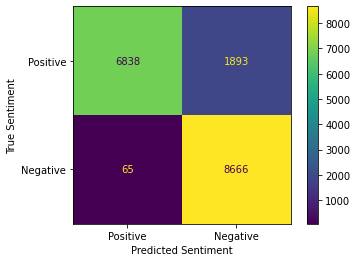

In [33]:
#Testing Naive Bayes on Training Set 
training_accuracy, training_error, training_predictions = test_naive_bayes(X_train, y_train, logprior, loglikelihood)
print("Training Set Accuracy is ", training_accuracy)

## Confusion Matrix of Training Set
print("The Confusion Matrix of Training Set is: \n")
cm_train=confusion_matrix(y_train, training_predictions)
cmd_train = ConfusionMatrixDisplay(cm_train, display_labels = ['Positive', 'Negative'])
cmd_train.plot()
cmd_train.ax_.set(xlabel = 'Predicted Sentiment', ylabel='True Sentiment')

Test Set Accuracy is  0.8207320331285065
The Confusion Matrix of Test Set is: 



[Text(0.5, 0, 'Predicted Sentiment'), Text(0, 0.5, 'True Sentiment')]

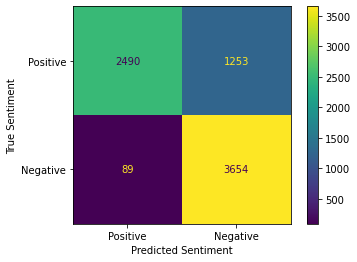

In [34]:
#Testing Naive Bayes on Test Set
testing_accuracy, testing_error, testing_predictions = test_naive_bayes(X_test, y_test, logprior, loglikelihood)
print("Test Set Accuracy is ", testing_accuracy)

## Confusion Matrix of Test Set
print("The Confusion Matrix of Test Set is: \n")
cm_test=confusion_matrix(y_test, testing_predictions)
cmd_test = ConfusionMatrixDisplay(cm_test, display_labels = ['Positive', 'Negative'])
cmd_test.plot()
cmd_test.ax_.set(xlabel='Predicted Sentiment', ylabel = 'True Sentiment')

## 7.4 Examination of False Positive and False Negative Cases

In [35]:
## False Positives and False Negatives in Training Set
print("Number of False Positives in Training Set: ", cm_train[1][0])
print("Number of False Negatives in Training Set: ", cm_train[0][1])

Number of False Positives in Training Set:  65
Number of False Negatives in Training Set:  1893


In [36]:
## False Positives and False Negatives in Testing Set
print("Number of False Positives in Test Set: ", cm_test[1][0])
print("Number of False Negatives in Test Set: ", cm_test[0][1])

Number of False Positives in Test Set:  89
Number of False Negatives in Test Set:  1253


#### 
False Positives are the cases in which the model predicts the class as Positive when the actual class is Negative.

False Negatives are the cases in which the model predicts the class as Negative when the actual class is Positive

The False Positives and False Negatives can be attributed to the assumption of Naive Bayes where the features/ words are independent of each other. The model does not take into account the context in which the words are used (i.e. the same word can be used in different parts of a document and hence can carry different meanings which in turn affect the conditional probability of the word associated with a class and therefore affect the sentiment).

In reality, a word can be used in different parts of a sentence which can lead to it having a different meaning in different sentences which affects the sentiment of the overall document.

# Q8. Modularize your calssifier (10 points)
1. Convert your code into a python module text_classifier.py

2. The user should be able to launch the application on command prompt using python test_classifier.py command. The module will automatically load the model paramters from a local file of your choice and be ready to take the input from user on command prompt. The program will preprocess user input, tokenize and predict the class.

3. Your module will take the input from user and output sentiment class in an indefinite loop. The output should printout the probabilities for each input token along with the final classification decision. Program will quit if user enters X.


In [37]:
## Writing logprior and loglikelihood (model parameters) to a .txt file
model_params = open("model_params.txt","w+")
model_params.write(str(logprior))
model_params.write("\n")
model_params.write(str(loglikelihood))
model_params.close()

## Now run test_classifier.py
## The model_params.txt file serves as the input to the test_classifier.py program. 
## The test_classifier.py program contains the clean_review() function and the naive_bayes_predict() function.
## When a user enters a review, the clean_review() function cleans the review.
## Then the model parameters are taken from the model_params.txt files and passed into the naive_bayes_predict() function to classify the review.
## Along with the movie review classfication, the log likelihood of the tokens in the review is also displayed.

## Below is a sample screenshot of the output.

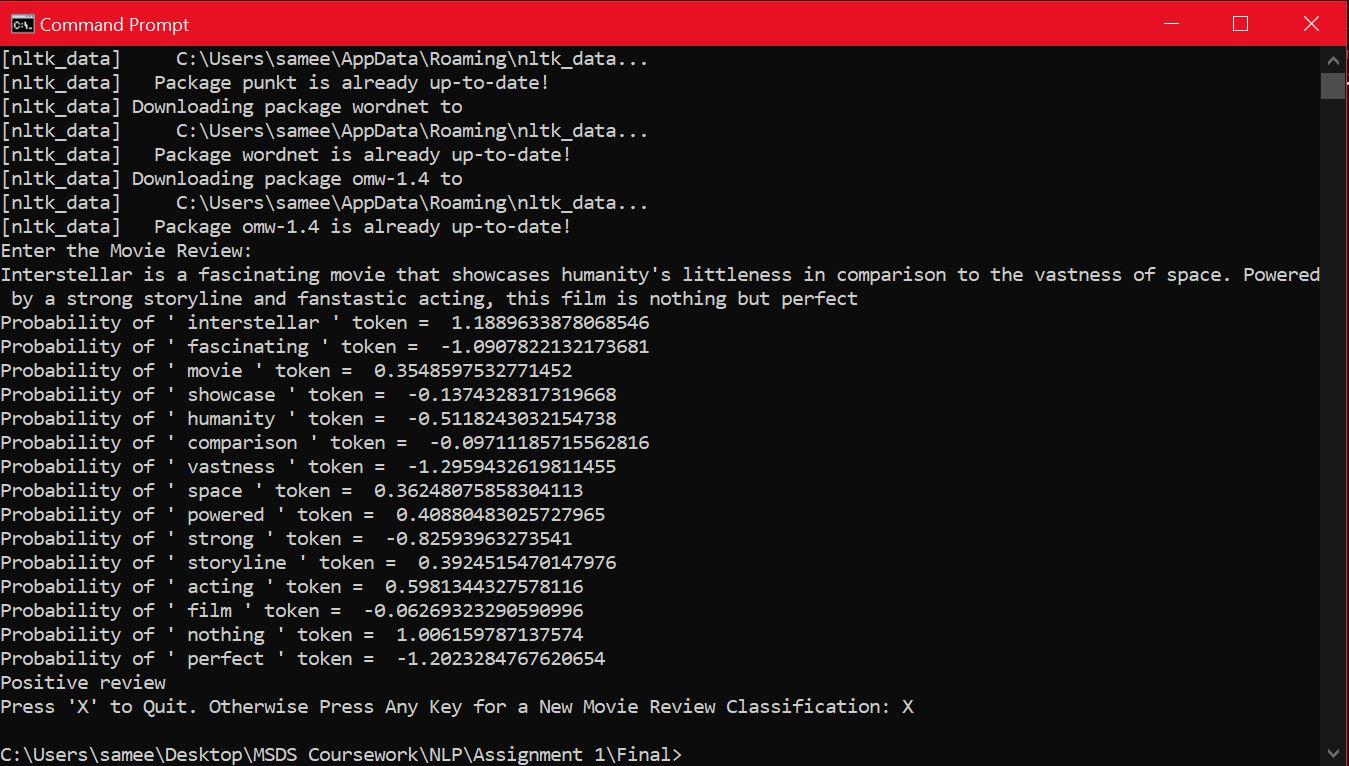

# Q9. Theory Questions: (10 points)

1. Why is Laplace Smoothing or Additive Smoothing required while executing Naive Bayes operations, especially for text classification? Show how not having additive smoothing leads to bad outcomes by using an example of training and the test set. (10 points)


2. Why are logarithmic values computed instead of only probability values in the Naive Bayes algorithm? (5 points)

## Answer to Part 1 of Question 9

We know that the conditional probability of a word belonging to a particular class is given by:

$P(w_i | C_k)$ = $\frac{count(w_i, C_k)}{\Sigma_{w \in V} count(w, C_k)}$ = $\frac{\textrm{count of word }w_i \textrm{ in class }C_k}{\textrm{Total count of each word across all documents having class } C_k}$

where V is the Vocabulary of the corpus.


We also know that the conditional probability of a class given a document. It is as follows:

$P(C_k|D) = P(w_1|C_k)\times P(w_2|C_k)\times P(w_3|C_k)\times \ldots \times P(w_n|C_k) \times P(C_k)$

where D is the document, and there are n words in the corpus.

Now, we come across a situation where the count of a specific word, given a certain class, may be zero. This will result in the conditional probability of that word associated given a class to be zero. Thereafter, it will also result in the conditional probability of that class given that document to be zero which may result in the incorrect classification of a document.

To avoid this issue, we increase the count of all words belonging to that class by a value α. This is done for the numerator and also for all the terms in the denominator in the conditional probability formula of a word given a class, which now becomes:

$P(w_i|C_k) = \frac{\alpha + count(w_i, C_k)}{\Sigma_{w \in V}(count(w, C_k) + \alpha)} = \frac{\alpha + count(w_i, C_k)}{\alpha |V| + \Sigma_{w \in V}count(w, C_k)}$

As long as α is greater than zero, will will avoid the issue where the conditional probability of a word given a class is zero. This will also result in the conditional probability of the class given document to be non-zero as well. 

Let's look at this using an example. Consider the following review:

In [38]:
custom_review = "If I had never seen an episode of the original Avengers, with Blackman, Rigg, or Thorson, I would have appreciated this series more. While the cast did its best to sustain the action and interest of the scripts, I was just caught up in comparing the episodes to the original series. There was an expectation of Steed participating more in fight scenes, and the continuity seemed as though the writers were struggling to keep up with the actors. To be honest, I can't blame them for trying to resurrect the fans from the original series, but it just didn't work, as evidenced by the fact that it lasted one season. Watching Steed labor through this series reminded me of Gen. Macarthur when he said, 'Old soldiers never die, they just fade away!' Shazam was okay, but Hero High was my favorite when I was a kid, I mean before there was Sky High(2005) and Zoom(2006), there was Hero High, a school for super hero's in training, Teenagers with super powers would help police capture bad guys, and other times they would get in embarrassing situations like The Greatest American Hero(1981). It was a fun cartoon to watch, what was also fun, was the live action stage show called The Kid Superpower Hour with Shazam. The actors who voiced the characters, also dressed has there characters in the show. Rex Ruthless(John Berwick), Misty Magic(Jere Fields), WeatherMan(Jim Greenleaf), Captain California(Chris Hensel, who also sang the theme song), Dirty Trixie(Maylo Mccaslin), Glorious Gal(Becky Perle, who looks like the love child of Superman and Wonder Woman), and Punk Rock(Johnny Venocour). The whole cast just went with anything, when it came to the jokes. The cartoon was a fun superhero comedy, I shore up it will come back in live action like Fat Albert(2004).Come as you are Nirvana is an amazing theme song for the movie."
custom_review_cleaned = clean_review(custom_review)
print(custom_review_cleaned)

['never', 'seen', 'episode', 'original', 'avenger', 'blackman', 'rigg', 'thorson', 'would', 'appreciated', 'series', 'cast', 'best', 'sustain', 'action', 'interest', 'script', 'caught', 'comparing', 'episode', 'original', 'series', 'expectation', 'steed', 'participating', 'fight', 'scene', 'continuity', 'seemed', 'though', 'writer', 'struggling', 'keep', 'actor', 'honest', 'cant', 'blame', 'trying', 'resurrect', 'fan', 'original', 'series', 'didnt', 'work', 'evidenced', 'fact', 'lasted', 'one', 'season', 'watching', 'steed', 'labor', 'series', 'reminded', 'gen', 'macarthur', 'said', 'old', 'soldier', 'never', 'die', 'fade', 'away', 'shazam', 'okay', 'hero', 'high', 'favorite', 'kid', 'mean', 'sky', 'high2005', 'zoom2006', 'hero', 'high', 'school', 'super', 'hero', 'training', 'teenager', 'super', 'power', 'would', 'help', 'police', 'capture', 'bad', 'guy', 'time', 'would', 'get', 'embarrassing', 'situation', 'like', 'greatest', 'american', 'hero1981', 'fun', 'cartoon', 'watch', 'also',

In [39]:
for (word, label) in freqs.keys():
    if word in custom_review_cleaned:
        if freqs[(word, label)] == 1:
            print("Token: ", word, ", Class: ", label, ", Token Count: ", freqs[(word, label)])

Token:  high2005 , Class:  0 , Token Count:  1
Token:  zoom2006 , Class:  0 , Token Count:  1
Token:  hero1981 , Class:  0 , Token Count:  1
Token:  ruthlessjohn , Class:  0 , Token Count:  1
Token:  berwick , Class:  0 , Token Count:  1
Token:  magicjere , Class:  0 , Token Count:  1
Token:  weathermanjim , Class:  0 , Token Count:  1
Token:  greenleaf , Class:  0 , Token Count:  1
Token:  californiachris , Class:  0 , Token Count:  1
Token:  hensel , Class:  0 , Token Count:  1
Token:  trixiemaylo , Class:  0 , Token Count:  1
Token:  mccaslin , Class:  0 , Token Count:  1
Token:  galbecky , Class:  0 , Token Count:  1
Token:  perle , Class:  0 , Token Count:  1
Token:  rockjohnny , Class:  0 , Token Count:  1
Token:  venocour , Class:  0 , Token Count:  1
Token:  blackman , Class:  0 , Token Count:  1
Token:  berwick , Class:  1 , Token Count:  1
Token:  gen , Class:  1 , Token Count:  1
Token:  greenleaf , Class:  1 , Token Count:  1
Token:  thorson , Class:  1 , Token Count:  1


As it can be seen, the words above have a count of 1 with their respective sentiment (i.e. Class = 0 is Positive sentiment and Class = 1 is Negative Sentiment). 

These words have a count of 1 because they originally do not exist in the documents of the respective classes shown above (i.e. if the class is 0, then the word does not exist in any of the documents having class 0 and if the class is 1, then the word does not exist in any of the documents having class 1).

The reason these words have a count of 1 is because of Laplace smoothing with α = 1 which prevented the conditional probability of the word given that class from becoming zero.

If Laplace smoothing was not performed, then the conditional probability of each of these words given the class would be zero which in turn would result in the conditional probability of the class given this review (i.e. document) to be zero as well resulting in misclassification.


## Answer to Part 2 of Question 9
We know that the conditional probability of a class given a document is as follows:

$P(C_k|D) = P(w_1|C_k)\times P(w_2|C_k)\times P(w_3|C_k)\times \ldots \times P(w_n|C_k) \times P(C_k)$

For a corpus that contains a large number of documents and a large vocabulary size, the conditional probability of the class given a document tends to approach zero because the probabilities are small values (i.e. this is the problem of underflow).

To avoid this problem, we apply the log function on the conditional probability of a word given a class and also apply the log function on the probability of the class itself. We then get the following formula:

$log(P(C_k|D)) = log(P(w_1|C_k))+log(P(w_2|C_k))+log(P(w_3|C_k))+ \ldots +log(P(w_n|C_k))+log(P(C_k))$

Applying the log function on each individual probability term that has a small value results in an ordinary sized which improves computation speed and gives log transformed conditional probability of a class given a document.